# 1. Considere os seguintes sistemas de equações lineares:

**EQUAÇÃO A** 

$4x_1 -x_2 - x_4 = 0$,

$-x_1+4x_2-x_3-x_5=5$,

$-x_2 + 4x_3 - x_6 = 0$,

$-x_1 + 4x_4 - x_5 = 6$,

$-x_2 - x_4 + 4x_5 - x_6 = -2$

$-x_3 - x_5 + 4x_6 = 6$.

****

****

**EQUAÇÃO B**

$2x_1 - x_2 + x_3 = -1$,

$2x_1 + 2x_2 + 2x_3 = 4$,

$-x_1 - x_2 + 2x_3 = -5$

****

****

**EQUAÇÃO C**

$4x_1 + x_2 - x_3 + x_4 = -2$,

$x_1 + 4x_2 - x_3 - x_4 = -1$,

$-x_1 - x_2 + 5x_3 + x_4 = 0$,

$x_1 - x_2 + x_3 + 3x_4 = 1$.

## a) Implemente o Método de Jacobi e o Método de Gauss-Seidel e tente resolver os três sistemas usando os dois métodos.

In [1]:
import math
import numpy as np
import pandas as pd
from numpy import linalg  

In [2]:
def jacobi(A,x0,tol,N,prints=False):
  '''
    A = matriz aumentada
    x0 = aproximaxoes iniciais

    tol = tolerancia minima (float)
    N = no maximo de iteracoes (int)
  '''
  b = A[:,-1] # ultima coluna
  A = A[:,:-1] # matriz nxn
  n = np.shape(A)[0]  
  x = np.zeros(n)  
  
  for it in range(N):
    if prints:
      print(f"Iteracao {it}: {x}")
    for i in np.arange(n):  
      x[i] = b[i]
      for j in np.concatenate((np.arange(0,i),np.arange(i+1,n))):  
        x[i] -= A[i,j]*x0[j]  
      x[i] /= A[i,i]  
      
    if np.linalg.norm(x-x0,np.inf) < tol:
        return x  
    x0 = np.copy(x)

  print("Numero maximo de iteracoes excedido")

In [3]:
def gauss_seidel(A, x0, tol, N,prints=False):
    b = A[:,-1] # ultima coluna
    A = A[:,:-1] # matriz nxn
    n = np.shape(A)[0]      
    # x = np.array(np.arange(n),dtype='double')   
    x = np.copy(x0)    
    
    for i in range(N):
      if prints:
        print(f"Iteracao {i}: {x}")

      # x = np.copy(x0)
      for j in range(n):
        x[j] = b[j] / A[j,j]
        for k in range(n):
          if k != j:
            x[j] -= (A[j,k] * x[k]) / A[j,j]

      if np.linalg.norm(x-x0,np.inf) < tol:
        return x  
      x0 = np.copy(x)
        

In [4]:
def printar_resultados(x,inicio=1):
  try:
    print("\nResultados obtidos:")
    for i in range(len(x)):
      print(f'x{i+inicio}: {x[i]}')
  except:
    print("Metodo usado nao convergiu")

In [5]:
a = np.array([[4,-1,0,-1,0,0,0],
     [-1,4,-1,0,-1,0,5],
     [0,-1,4,0,0,-1,0],
     [-1,0,0,4,-1,0,6],
     [0,-1,0,-1,4,-1,-2],
     [0,0,-1,0,-1,4,6]],dtype='double')

x0 = np.zeros(np.shape(a)[0])

print("Resultado para o Método de Jacobi:")
xa_jacobi = jacobi(a,x0,0.00001,100,prints=True)
printar_resultados(xa_jacobi)

print('\n\n')

print("Resultado para o Método de Gauss Seidel:")
xa_seidel = gauss_seidel(a,x0,0.00001,100,prints=True)
printar_resultados(xa_seidel)

Resultado para o Método de Jacobi:
Iteracao 0: [0. 0. 0. 0. 0. 0.]
Iteracao 1: [ 0.    1.25  0.    1.5  -0.5   1.5 ]
Iteracao 2: [0.6875 1.125  0.6875 1.375  0.5625 1.375 ]
Iteracao 3: [0.625    1.734375 0.625    1.8125   0.46875  1.8125  ]
Iteracao 4: [0.88671875 1.6796875  0.88671875 1.7734375  0.83984375 1.7734375 ]
Iteracao 5: [0.86328125 1.90332031 0.86328125 1.93164062 0.80664062 1.93164062]
Iteracao 6: [0.95874023 1.88330078 0.95874023 1.91748047 0.94165039 1.91748047]
Iteracao 7: [0.95019531 1.96478271 0.95019531 1.97509766 0.92956543 1.97509766]
Iteracao 8: [0.98497009 1.95748901 0.98497009 1.96994019 0.97874451 1.96994019]
Iteracao 9: [0.9818573  1.98717117 0.9818573  1.99092865 0.97434235 1.99092865]
Iteracao 10: [0.99452496 1.98451424 0.99452496 1.98904991 0.99225712 1.98904991]
Iteracao 11: [0.99339104 1.99532676 0.99339104 1.99669552 0.99065351 1.99669552]
Iteracao 12: [0.99800557 1.9943589  0.99800557 1.99601114 0.99717945 1.99601114]
Iteracao 13: [0.99759251 1.99829765 

In [6]:
b = np.array([[2,-1,1,-1],
              [2,2,2,4],
              [-1,-1,2,-5]],dtype='double')

x0_b = np.zeros(np.shape(b)[0])

print("Resultado para o Método de Jacobi:")
xb_jacobi = jacobi(b,x0_b,0.00001,100,prints=True)
printar_resultados(xb_jacobi)

print('\n\n')

print("Resultado para o Método de Gauss Seidel:")
xb_seidel = gauss_seidel(b,x0_b,0.000003,100,prints=True)
printar_resultados(xb_seidel)

Resultado para o Método de Jacobi:
Iteracao 0: [0. 0. 0.]
Iteracao 1: [-0.5  2.  -2.5]
Iteracao 2: [ 1.75  5.   -1.75]
Iteracao 3: [2.875 2.    0.875]
Iteracao 4: [ 0.0625 -1.75   -0.0625]
Iteracao 5: [-1.34375  2.      -3.34375]
Iteracao 6: [ 2.171875  6.6875   -2.171875]
Iteracao 7: [3.9296875 2.        1.9296875]
Iteracao 8: [-0.46484375 -3.859375    0.46484375]
Iteracao 9: [-2.66210938  2.         -4.66210938]
Iteracao 10: [ 2.83105469  9.32421875 -2.83105469]
Iteracao 11: [5.57763672 2.         3.57763672]
Iteracao 12: [-1.28881836 -7.15527344  1.28881836]
Iteracao 13: [-4.7220459  2.        -6.7220459]
Iteracao 14: [ 3.86102295 13.4440918  -3.86102295]
Iteracao 15: [8.15255737 2.         6.15255737]
Iteracao 16: [ -2.57627869 -12.30511475   2.57627869]
Iteracao 17: [-7.94069672  2.         -9.94069672]
Iteracao 18: [ 5.47034836 19.88139343 -5.47034836]
Iteracao 19: [12.1758709  2.        10.1758709]
Iteracao 20: [ -4.58793545 -20.35174179   4.58793545]
Iteracao 21: [-12.96983862 

In [7]:
c = np.array([[4,1,-1,1,-2],
              [1,4,-1,-1,-1],
              [-1,-1,5,1,0],
              [1,-1,1,3,1]],dtype='double')

x0_c = np.zeros(np.shape(c)[0])

print("Resultado para o Método de Jacobi:")
xc_jacobi = jacobi(c,x0_c,0.00001,100,prints=True)
printar_resultados(xc_jacobi)

print('\n\n')

print("Resultado para o Método de Gauss Seidel:")
xc_seidel = gauss_seidel(c,x0_c,0.000003,100,prints=True)
printar_resultados(xc_seidel)

Resultado para o Método de Jacobi:
Iteracao 0: [0. 0. 0. 0.]
Iteracao 1: [-0.5        -0.25        0.          0.33333333]
Iteracao 2: [-0.52083333 -0.04166667 -0.21666667  0.41666667]
Iteracao 3: [-0.64791667 -0.06979167 -0.19583333  0.56527778]
Iteracao 4: [-0.67282986  0.00434028 -0.25659722  0.59131944]
Iteracao 5: [-0.71306424  0.00188802 -0.25196181  0.64458912]
Iteracao 6: [-0.72460974  0.02642289 -0.27115307  0.65563802]
Iteracao 7: [-0.73830349  0.02727367 -0.27076497  0.6740619 ]
Iteracao 8: [-0.74302514  0.0354001  -0.27701834  0.67878071]
Iteracao 9: [-0.74779979  0.03619688 -0.27728115  0.68514786]
Iteracao 10: [-0.74965647  0.03891663 -0.27935016  0.68709261]
Iteracao 11: [-0.75133985  0.03934973 -0.27956649  0.68930775]
Iteracao 12: [-0.75205599  0.04027028 -0.28025957  0.69008536]
Iteracao 13: [-0.7526538   0.04047044 -0.28037421  0.69086195]
Iteracao 14: [-0.75292665  0.04078538 -0.28060906  0.69116615]
Iteracao 15: [-0.75314015  0.04087094 -0.28066148  0.69144037]
Ite

## b) Implemente uma função que calcule o raio espectral e use-a para explicar porque um dos sistemas acima não converge.

In [8]:
from scipy import linalg
from autograd import grad, jacobian

In [9]:
def raio_espectral(A):
  return max(abs(linalg.eigvals(A))).real

In [10]:
def matriz_T(A, metodo):
  D = np.diag(np.diag(A))
  L = np.tril(A) - D  
  U = np.triu(A) - D

  if metodo == "j":
    T = -np.linalg.inv(D).dot(L + U)
  elif metodo == "gs":
    T = -np.linalg.inv(L + D).dot(U)
  else:
    print("Metodo invalido")
    return

  return T

In [11]:
def converge(A):

  T_jacobi = matriz_T(A, "j")
  T_seidel = matriz_T(A, "gs")

  re_jacobi = raio_espectral(T_jacobi)
  re_seidel = raio_espectral(T_seidel)

  if re_jacobi < 1:
    print("Converge pelo metodo de Jacobi")
  else:
    print("Nao converge pelo metodo de Jacobi")

  if re_seidel < 1:
    print("Converge pelo metodo de Guass-Seidel")
  else:
    print("Nao converge pelo metodo de Guass-Seidel")

In [12]:
a = np.array([[4,-1,0,-1,0,0,0],
     [-1,4,-1,0,-1,0,5],
     [0,-1,4,0,0,-1,0],
     [-1,0,0,4,-1,0,6],
     [0,-1,0,-1,4,-1,-2],
     [0,0,-1,0,-1,4,6]],dtype='double')

b = np.array([[2,-1,1,-1],
              [2,2,2,4],
              [-1,-1,2,-5]],dtype='double')

c = np.array([[4,1,-1,1,-2],
              [1,4,-1,-1,-1],
              [-1,-1,5,1,0],
              [1,-1,1,3,1]],dtype='double')

print("Para a matriz A:")
converge(a[:,:-1])
print("\n\nPara a matriz B:")
converge(b[:,:-1])
print("\n\nPara a matriz C:")
converge(c[:,:-1])

Para a matriz A:
Converge pelo metodo de Jacobi
Converge pelo metodo de Guass-Seidel


Para a matriz B:
Nao converge pelo metodo de Jacobi
Converge pelo metodo de Guass-Seidel


Para a matriz C:
Converge pelo metodo de Jacobi
Converge pelo metodo de Guass-Seidel


In [13]:
# O raio espectral da matriz A, denotado por ρ(A), é dado por ρ(A) = max|λ|, 
# onde λ é o autovalor de A.
def raio(T):
  s = linalg.eigvals(T)
  
  return max(abs(s))

# Matriz T usada para checar a Convergência da matriz A a partir do método de Jacobi,
# denotada por Tj = D^(-1) * (L + U)
def matrizTJacobi(A):
  D = np.diag(np.diag(A))  
  L = np.tril(A) - D
  U = np.triu(A) - D

  T = -np.linalg.inv(D).dot(L + U)

  return T  

# Matriz T usada para checar a Convergência da matriz A a partir do método de Gauss-Seidel,
# denotada por Tg = (D - L)^(-1) * U
def matrizTGauss(A):
  D = np.diag(np.diag(A))  
  L = np.tril(A) - D  
  U = np.triu(A) - D

  T = -np.linalg.inv(L + D).dot(U)

  return T

# 2. Responda às questões abaixo:

## a) Aproveitando a função implementada na segunda questão da segunda lista, implemente uma nova função que plote, além do gráfico de uma função $y=f(x)$, um conjunto de pontos $X \subset \mathbb{R}^2$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [15]:
def f(x, pontos=[]):
  return x**3 + 4*(x)**2-10

In [16]:
def plotar_f(f, delta, pontos, title='', is_f=True):
  x_points = [x for (x, y) in pontos]
  y_points = [y for (x, y) in pontos]
  a, b = min(x_points) - delta, max(x_points) + delta

  x = np.arange(a, b + delta, delta)
  if is_f: f_points = [f(xi) for xi in x]
  else: f_points = [f(xi, pontos) for xi in x]

  plt.figure(figsize=(10,8))
  plt.title(title, fontsize=20)
  plt.plot(x, f_points)
  plt.plot(x_points, y_points, 'bo')
  plt.xlim([a, b])
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')
  plt.grid()
  plt.show()

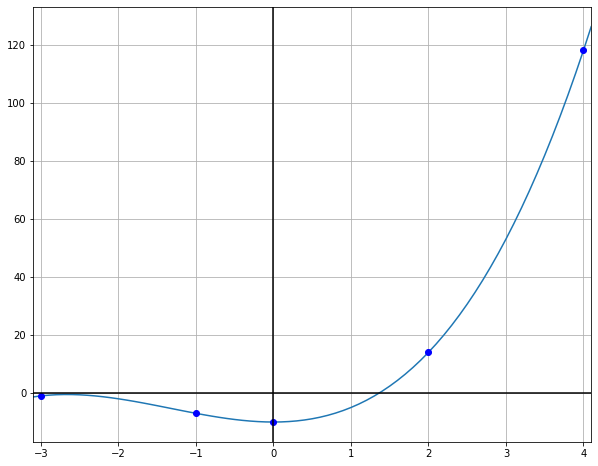

In [17]:
pontos = [(-3, -1), (-1, -7), (0, -10), (2, 14), (4, 118)]
plotar_f(f, delta = 0.1, pontos = pontos)

In [18]:
def getXY(pontos):
  x = [x for (x, y) in pontos]
  y = [y for (x, y) in pontos]

  return x,y

## b) Adapte a formulação do ajuste linear de mínimos quadrados a dados, de forma que a função ajustada seja um polinômio de grau $n$, onde são dados como entrada um conjunto de pontos $X \subset \mathbb{R}^2$ e o número inteiro $n$. Crie três exemplos, com graus = 3, 5 e 6, considerando $|X|>2n$ em cada caso. Use a função da letra a) para visualizar os resultados.

In [19]:
def substituicao_reversaU(U, y):
  n = U.shape[0]
  x = np.zeros(n)

  x[n-1] = y[n-1]/U[n-1,n-1]

  for i in range(n-2, -1, -1):
    x[i] = (y[i] - np.dot(U[i,i:n], x[i:n])) / U[i,i]

  return x

def matriz_permutacao(A):
  n = len(A)
  P = np.eye(n) # matriz de permutacao

  for i in range(n):
    k = list(A[:,i]).index(max(A[:,i], key=abs))

    linha_i = list(P[i,:]).index(1)
    linha_k = list(P[k,:]).index(1)

    P[i,linha_i] = 0
    P[i,linha_k] = 1

    P[k,linha_k] = 0
    P[k,linha_i] = 1

  return P

def get_LU(A,prints=True):
  """
    A: matriz dos coeficientes do sistema
    return: lista com duas matrizes (L e U, respectivamente)  

    Definição: função para decompor as matrizes L e U
  """

  n = A.shape[0]
  U = A.copy()
  L = np.eye(n) # matriz identidade

  if prints:
    print(f"L (0):\n {L}")
    print(f"U (0):\n {U}")
    print()

  for i in range(n-1):
    for j in range(i+1,n):

      if U[j,i] != 0:
        L[j,i] = U[j,i]/U[i,i]
        U[j,i:n] = U[j, i:n] - (L[j,i] * U[i,i:n])

    if prints:
      print(f"L ({i+1}):\n {L}")
      print(f"U ({i+1}):\n {U}")
      print()

  return [L,U]

def substituicao_reversaL(L, b):
  n = L.shape[0]
  x = np.zeros(n)

  x[0] = b[0]/L[0,0]

  for i in range(1,n):
    x[i] = (b[i] - np.dot(L[i,0:i], x[0:i])) / L[i,i]

  return x

def decomposicao_PtLU(A,b,prints=True):
  P = matriz_permutacao(A)
  PA = np.dot(P,A)

  if prints:
    print(f"P:\n {P}")
    print(f"PA:\n {PA}\n")

  L, U = get_LU(PA,prints)
  y = substituicao_reversaL(L,np.matmul(P,b))
  x = substituicao_reversaU(U,y)

  return x

In [20]:
def minQuadrados(pontos, n):
  A = np.zeros((n+1, n+1))
  b = np.zeros(n+1)

  for i in range(n+1):
    for j in range(n+1):
      A[i, j] = sum(x ** (i + j) for (x, y) in pontos) 

  for i in range(n+1):
    b[i] = sum(y * (x ** i) for (x, y) in pontos)
 
  # print(f"A = {A}\n")
  # print(f"b = {b}\n")

  coeficientes = decomposicao_PtLU(A, b, prints=False)

  return coeficientes

In [21]:
def createPoints(n):
  x, y = [], []
  i, j = 0, 0
  while i < n:
    x_random, y_random = random.randint(-10, 10), round(random.uniform(0, 12.5), 2)
    if not ((x_random in x) or (y_random in y)):
      x.append(x_random)
      y.append(y_random)
      i += 1

  return list(zip(x, y))

createPoints(11)

[(-7, 6.89),
 (4, 0.61),
 (-4, 0.95),
 (9, 7.01),
 (6, 5.24),
 (10, 6.63),
 (5, 7.24),
 (-2, 10.46),
 (-10, 7.88),
 (-8, 7.29),
 (1, 6.42)]

In [22]:
exemplos = [
    ([(-8, 7.41), (-1, 11.48), (-3, 2.90), (4, 1.56), (3, 0.24), (2, 3.92), (7, 2.04)], 3),
    ([(2, 9.61), (8, 10.28), (-1, 5.28), (7, 4.73), (-3, 8.88), (0, 4.53), (-7, 2.01), (-5, 1.89), (5, 2.51)], 4),
    ([(10, 12.1), (-9, 11.6), (-2, 7.9), (-1, 3.86), (2, 9.23), (3, 10.9), (9, 9.1), (-4, 8.18), (5, 1.57), (-6, 2.0),(-3, 9.44)], 5),
  ]

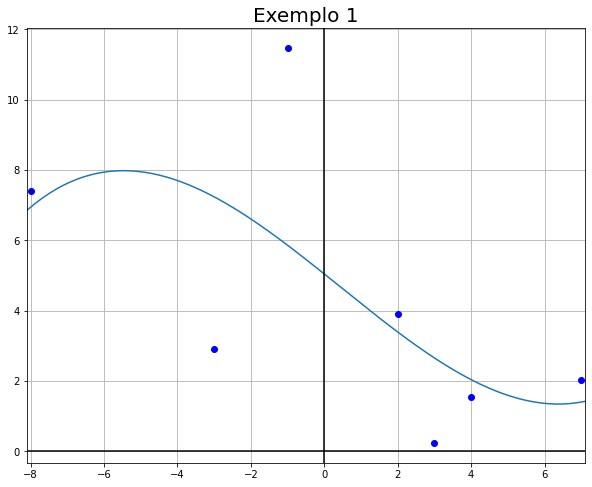

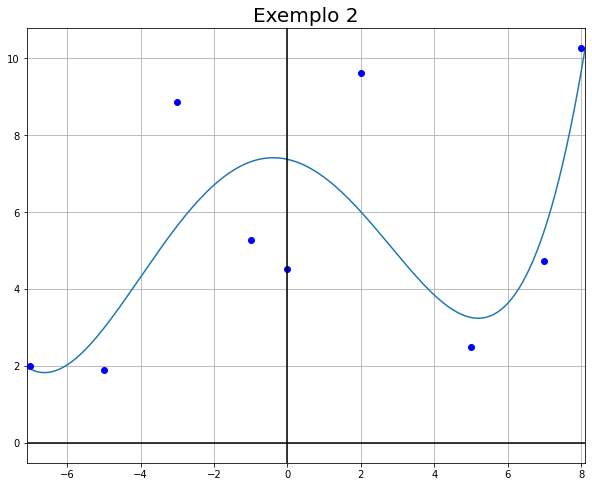

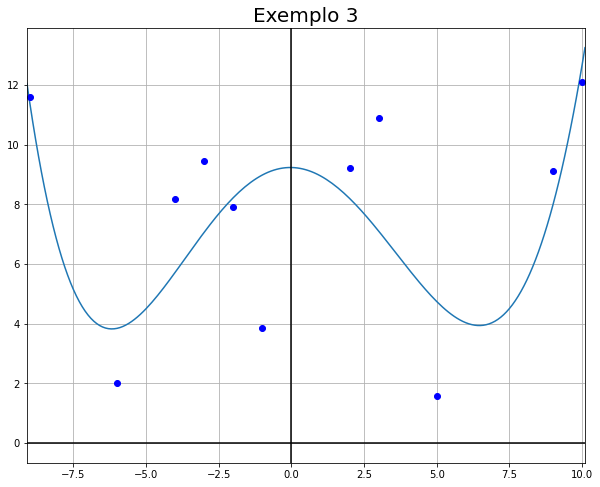

In [23]:
def plotMinQuadrados(exemplos):

  for (i, exemplo) in enumerate(exemplos):
    pontos, grau = exemplo
    coeficientes = minQuadrados(pontos, grau)
    f = np.poly1d(coeficientes[::-1])
    plotar_f(f, delta = 0.1, pontos = pontos, title=f"Exemplo {i+1}")
    print()

plotMinQuadrados(exemplos)

## c) Repita a mesma tarefa da questão anterior, com os mesmos exemplos, usando polinômios de Lagrange de grau $n=|X|-1$.

In [24]:
def lagrange(xp, pontos):
  n = len(pontos)
  x, y = getXY(pontos)
  # x = [x for (x, y) in pontos]
  # y = [y for (x, y) in pontos]
  yp = 0
  for i in range(n):
    p = 1
    for j in range(n):
      if i != j:
        p = p * (xp - x[j])/(x[i] - x[j])
    yp += p * y[i] 

  return yp

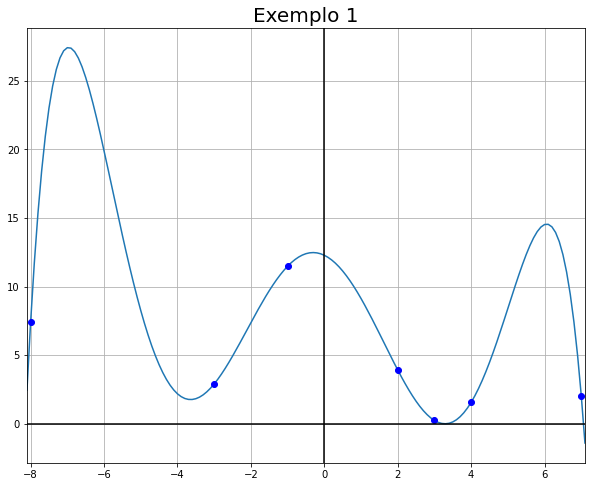

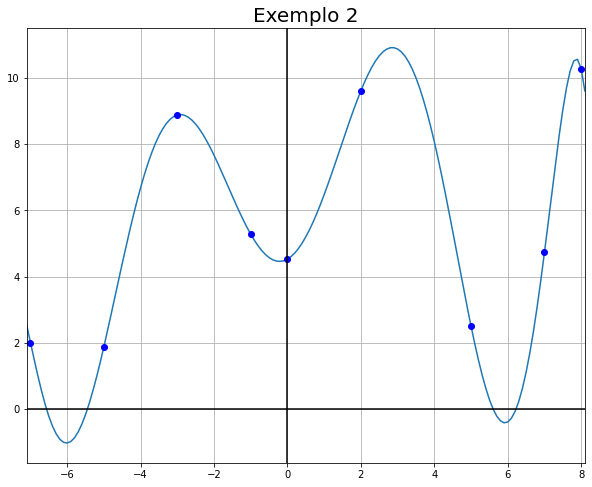

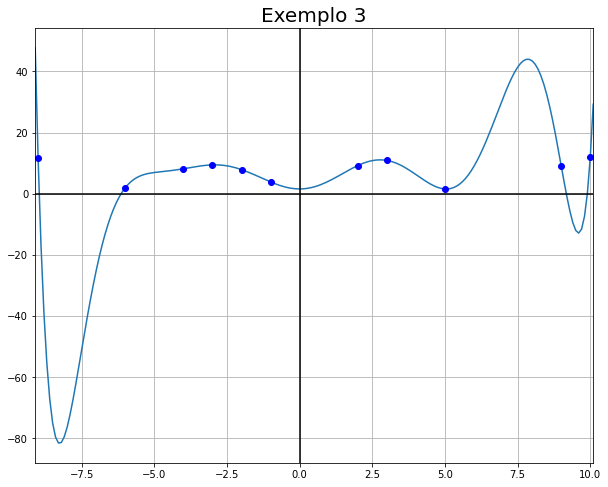

In [25]:
def plotLagrange(exemplos):
  for (i, exemplo) in enumerate(exemplos):
    pontos, grau = exemplo
    plotar_f(lagrange, delta = 0.1, pontos = pontos, title=f"Exemplo {i+1}", is_f=False)
    print()

plotLagrange(exemplos)

## d) Aplique o Método de Neville para aproximar os valores de $f(x)$ nos pontos médios entre cada par de abscissas consecutivas dadas de entrada. Exemplo: se $X=\left\{ (1,2),(2,-4),(4,6) \right\}$, você deve aproximar $f(1.5)$ e $f(3)$.

In [27]:
def neville(xp, pontos):
  n = len(pontos)
  x, y = getXY(pontos)
  x = [x for (x, y) in pontos]
  y = [y for (x, y) in pontos]

  Q = np.zeros((n, n))

  for k in range(n):
    for i in range(k, n):
      if k == 0:
        Q[i, k] = y[i]
      else:
        eq1 = (xp - x[i-k]) * Q[i, k-1]
        eq2 = (xp - x[i]) * Q[i - 1,k - 1]
        eq3 = x[i] - x[i-k]

        Q[i, k] = (eq1 - eq2) / eq3

        
  return Q, Q[n-1, n-1]

In [28]:
pontos_exemplo = [
  [(1, 2), (2, -4), (4, 6)],
  [(1, 0.7651977), (1.3, 0.6200860), (1.6, 0.4554022), (1.9, 0.2818186), (2.2, 0.1103623)]
]

In [29]:
def pontosMedios(pontos):
  x, y = getXY(pontos)
  x_estimados = []

  for i in range(len(x) - 1):
    ponto_medio = (x[i+1] + x[i]) / 2
    x_estimados.append(ponto_medio)

  return x_estimados

def exemploNaville(pontos_exemplo):
  for (i, pontos) in enumerate(pontos_exemplo):
    print(f"Exemplo {i+1}:\n")

    x_estimados = pontosMedios(pontos)
    for ponto in x_estimados:
      tabela, aproximacao = neville(ponto, pontos)
      print(f"f({round(ponto, 2)}) = {round(aproximacao, 2)}\n")

exemploNaville(pontos_exemplo)

Exemplo 1:

f(1.5) = -1.92

f(3.0) = -2.67

Exemplo 2:

f(1.15) = 0.7

f(1.45) = 0.54

f(1.75) = 0.37

f(2.05) = 0.2



# 3. Responda às questões abaixo:

## a) Implemente uma função que receba o string com a expressão de $f(x)$, um número real $a$ e retorne o valor de $f(a)$.

Dica: em Python, você pode usar a biblioteca $sympy$ com as funções $sympify$ e $subs$.

In [30]:
from sympy import symbols, sympify

In [31]:
def stringToEquation(str_equation):
  try:
    equation = sympify(str_equation)
    return equation
  except: 
    print("Enter a valid string equation")
    return 

In [32]:
def get_fx(str_equation, x):
  equation = stringToEquation(str_equation)
  x_symbol = symbols('x')

  return equation.subs(x_symbol, x)
  
f = 'x**2 + 2*x + 4'
a = 2
result = get_fx(f, a)
print(f"f({a}) = {result}")

f(2) = 12


## b) Usando a função implementada na letra a), implemente um programa que receba uma string com a expressão de uma função qualquer, um intervalo $[a,b]$, e uma quantidade de amostras $n$ e plote seu gráfico. Ilustre seu funcionamento com 3 gráficos de funções distintas.

In [33]:
def plot_string_equation(str_equation, a, b, n):
  equation = stringToEquation(str_equation)
  x_symbol = symbols('x')
  
  interval = abs(a) + abs(b)
  delta = interval / n
  x = np.arange(a, b + delta, delta)
  y = [equation.subs(x_symbol, xi) for xi in x]
  
  plt.figure(figsize=(10,8))
  plt.title(equation, fontsize=20)
  plt.plot(x, y)
  plt.xlim([a, b])
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')
  plt.grid()
  plt.show()


In [34]:
example_functions = [
  ("x**2 + 2*x + 4", -10, 10, 1000),
  ("cos(x)", -np.pi, np.pi, 1000),
  ("sin(x)", -np.pi, np.pi, 1000)
]

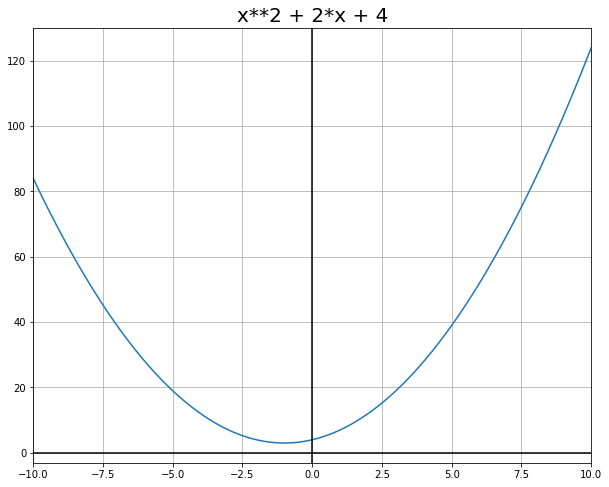

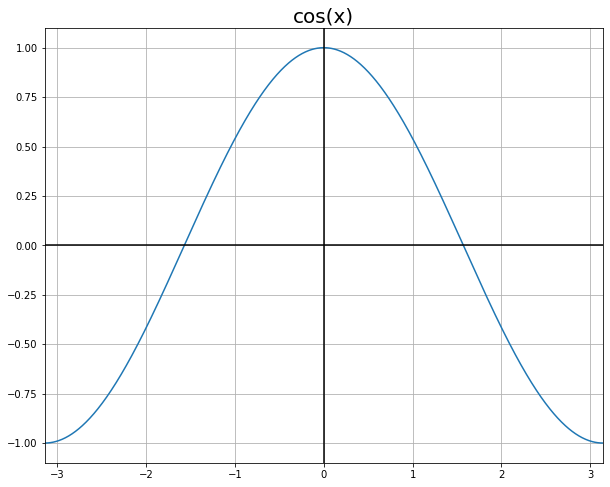

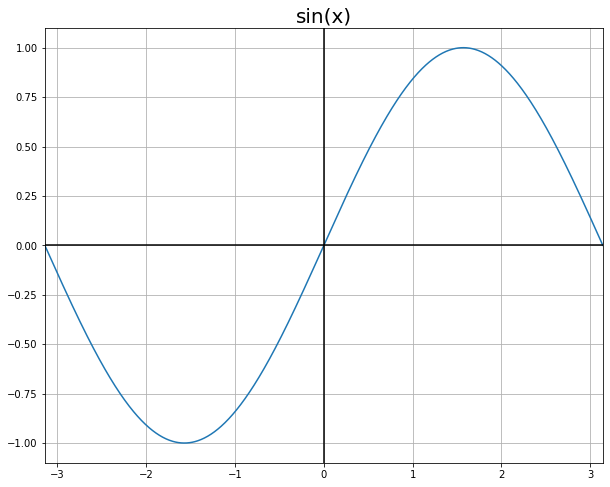

In [35]:
def plotExamples(example_functions):

  for example in example_functions:
    equation, a, b, n = example
    plot_string_equation(equation, a, b, n)
    print()

plotExamples(example_functions)

## c) Implemente uma função que aproxime a primeira e a segunda derivada em qualquer ponto da amostra de uma função dada como string usando 3 pontos. Plote o gráfico da primeira e da segunda derivada obtida dessa maneira junto com o gráfico da função (implementado na letra b)). Ilustre seu funcionamento com 3 exemplos usando funções distintas.

In [36]:
from sympy import *

In [37]:
def erro_primeira_derivada(f_string, x, h):
  equation = sympify(f_string)
  x_symbol = Symbol('x')
  f = lambdify(x_symbol, equation, 'numpy')

  x0 = x - h
  x1 = x + h

  px = f(x0) * (x-x1) / (x0-x1)
  px += f(x1) * (x-x0) / (x1-x0)

  erro = 6*(f(x)-px) / (h * (-h) * (-2*h))

  return erro

In [38]:
def erro_segunda_derivada(f_string, x, h):
  equation = sympify(f_string)
  x_symbol = Symbol('x')
  f = lambdify(x_symbol, equation, 'numpy')
  
  x0 = x - h
  x1 = x + h
  x2 = x + 2*h

  px =  f(x0) * ((x-x1) * (x-x2)) / ((x0-x1) * (x0-x2)) # L0
  px += f(x1) * ((x-x0) * (x-x2)) / ((x1-x0) * (x1-x2)) # L1
  px += f(x2) * ((x-x0) * (x-x1)) / ((x2-x0) * (x2-x1)) # L2

  erro = 24*(f(x)-px) / (h * (-h) * (-2*h) * (-3*h))

  return erro

In [39]:
def derivada(f_string, x, a, b, h):
  erro = erro_primeira_derivada(f_string,x,h)

  equation = sympify(f_string)
  x_symbol = Symbol('x')
  f = lambdify(x_symbol, equation, 'numpy')

  if x == a:
    fx = ((4 * f(x+h) - f(x+2*h) - 3*f(x)) / (2*h)) + (h**2 * erro)/3 
  elif x == b:
    fx = ((3*f(x) + f(x-2*h) - 4*f(x-h)) / (2*h)) + (h**2 * erro)/3 
  else:
    fx = ((f(x+h) - f(x-h)) / (2*h)) - (h**2 * erro)/3 

  return fx

In [40]:
def segunda_derivada(f_string, x, a, b, h):
  equation = sympify(f_string)
  x_symbol = Symbol('x')
  f = lambdify(x_symbol, equation, 'numpy')

  erro = erro_segunda_derivada(f_string, x, h)

  if x==a:
    fx = (f(x) + f(x+2*h) - 2*f(x+h)) / (h**2) - (erro * h**2)/12
  elif x==b:
    fx = (f(x-2*h) + f(x) - 2*f(x-h)) / (h**2) - (erro * h**2)/12
  else:
    fx = (f(x-h) + f(x+h) - 2*f(x)) / (h**2) - (erro * h**2)/12

  return fx

In [53]:
def plot_aprox_derivada(str_equation, a, b, h):

  interval = abs(a) + abs(b)
  delta = interval / 100
  x = np.arange(a, b + delta, delta)

  equation = sympify(str_equation)
  x_symbol = Symbol('x')
  f = lambdify(x_symbol, equation, 'numpy')

  fx = [f(xi) for xi in x]
  y_primeira_derivada = [derivada(str_equation, xi, a, b, h) for xi in x] # derivada(f_string, x, a, b, h)
  y_segunda_derivada = [segunda_derivada(str_equation, xi, a, b, h) for xi in x] # segunda_derivada(f_string, x, a, b, h)

  plt.figure(figsize=(10,8))
  plt.title(f"Aproximação da derivada de {str_equation}", fontsize=20)
  plt.plot(x, fx, label = str_equation)
  plt.plot(x, y_primeira_derivada, label = "primeira derivada")
  plt.plot(x, y_segunda_derivada, label = "segunda derivada")
  plt.xlim([a, b])
  plt.axhline(y=0, color='black')
  plt.axvline(x=0, color='black')
  plt.legend(fontsize=18)
  plt.grid()
  plt.show()

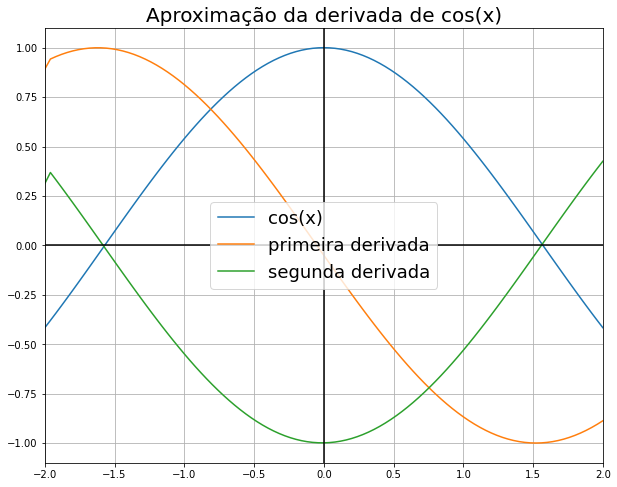

In [54]:
plot_aprox_derivada("cos(x)", -2, 2, 0.1)

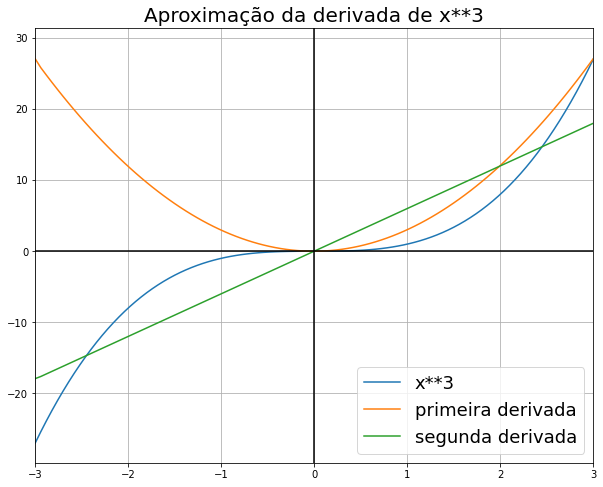

In [55]:
plot_aprox_derivada("x**3", -3,3, 0.01)

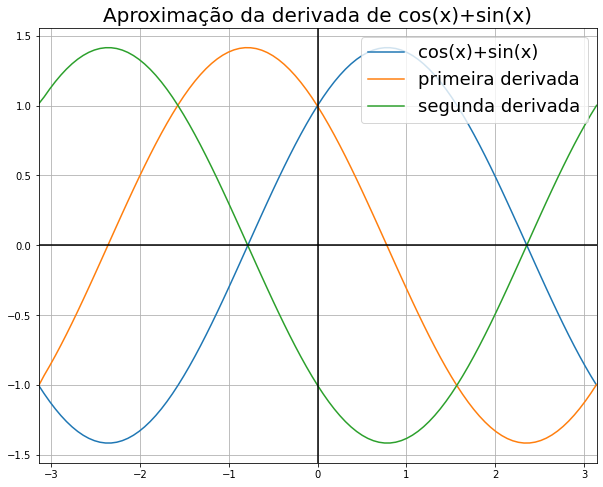

In [56]:
plot_aprox_derivada("cos(x)+sin(x)", -math.pi,math.pi, 0.01)

## d) Implemente uma função que calcule a integral definida usando a amostra de uma função dada como string e o seu intervalo de integração $[a,b]$. Com este objetivo, use a regra de Simpson composta, especificando a quantidade de subintervalos $n$ como parâmetro de entrada. Ilustre seu funcionamento com 3 gráficos de funções distintas e 3 valores de $n$ distintos em cada caso.

In [45]:
def integral_simpson(str_funcao, a, b, n):

  equation = stringToEquation(str_funcao)
  x_symbol = Symbol('x')
  f = lambdify(x_symbol, equation, 'numpy')

  if int(n) % 2: # para garantir numero par de intervalos
    n += 1
  x = np.linspace(a, b, n+1, dtype=float)
  y = [f(xi) for xi in x]
  h = abs(b - a) / n

  Si = np.sum(y[1:-1:2]) # posicoes impares
  Sp = np.sum(y[2:-1:2]) # posicoes pares

  S = y[0] + 4. * Si + 2. * Sp + y[-1]

  return h * S / 3.0

In [46]:
integral_simpson("x**2", 0, 2, 100)

2.6666666666666665

In [47]:
integral_simpson("(x**3)-6*x", 0, 3, 100)

-6.750000000000001

In [48]:
integral_simpson("cos(x)-2*x", 0, math.pi, 100)

-9.869604401089358